# Fraud Detection — Интерпретация модели

## 🎯 Цель

С помощью библиотеки SHAP объясним, какие признаки наиболее сильно влияют на предсказание мошенничества.


In [ ]:
import shap
import xgboost
import pandas as pd

# Повторно загрузим данные и модель
df = pd.read_csv("/content/creditcard.csv")
X = df.drop('Class', axis=1)
y = df['Class']

# Разделим выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Балансировка
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Обучим модель
model = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_bal, y_train_bal)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:19:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
explainer = shap.Explainer(model, X_train_bal)

shap_values = explainer(X_test)

100%|===================| 56952/56962 [06:03<00:00]       

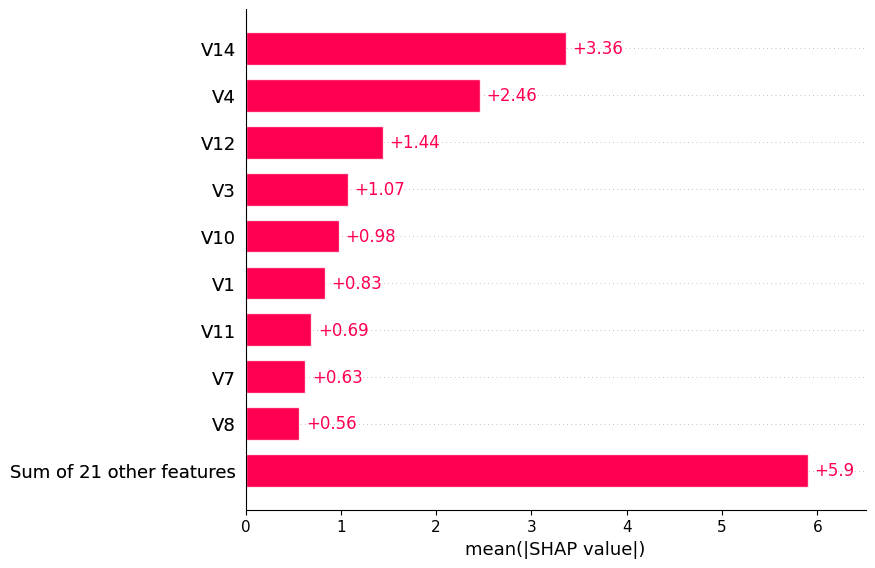

In [ ]:
shap.plots.bar(shap_values)

## 📌 Глобальная важность признаков

На этом графике показано, какие признаки в среднем больше всего влияют на предсказания модели. Это важно, чтобы понять, как модель принимает решения.


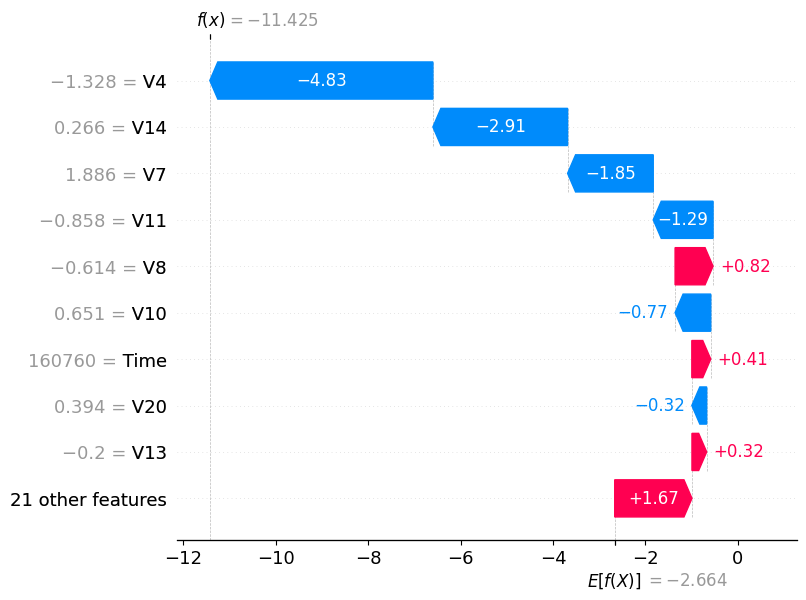

In [ ]:
# Объяснение одной конкретной транзакции
shap.plots.waterfall(shap_values[0])


## 🔍 Объяснение конкретного предсказания

На этом графике видно, какие именно признаки "затащили" модель к фроду или наоборот.
